In [95]:
import h5py
import cv2
from sklearn.model_selection import train_test_split
import seaborn as sns



import os, sys, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2


ROOT_PATH = '..'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
def color(index, alpha=1):
    color_list = ['#0c6575', '#bbcbcb', '#23a98c', '#fc7a70', '#a07060', '#003847', '#FFF7D6', '#5CA4B5', '#eeeeee']
    return color_list[index % len(color_list)] + hex(int(255 * alpha))[2:]

In [15]:
df = pd.read_csv(f'{ROOT_PATH}/data/train.csv')
df.head(3)

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1


In [101]:
df_to_predict = pd.read_csv(f'{ROOT_PATH}/data/test.csv')
df_to_predict.head(3)

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638


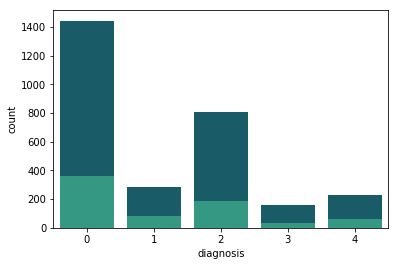

In [84]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

ax = sns.countplot(df_train['diagnosis'], color=color(0))
sns.countplot(df_test['diagnosis'], color=color(2), ax=ax)

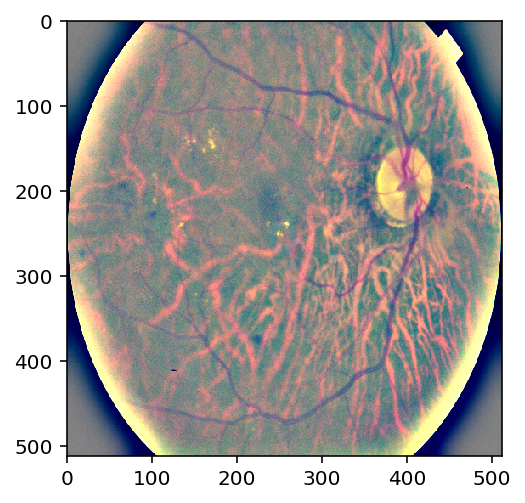

In [96]:
img_path = f'{ROOT_PATH}/data/train_processed/{row.id_code}.png'
img = cv2.imread(img_path)
plt.imshow(img)

In [100]:
df_test.shape[0]

733

In [102]:
data_filename = f'{root_path}/data/data.h5'
with h5py.File(data_filename, "w") as out:
    
    data_type = 'uint8'
    IMG_SIZE = 512
    
    out.create_dataset("X_train",(df_train.shape[0],IMG_SIZE,IMG_SIZE,3),dtype=data_type)
    out.create_dataset("y_train",(df_train.shape[0], 1),dtype='int')       
    
    out.create_dataset("X_test",(df_test.shape[0],IMG_SIZE,IMG_SIZE,3),dtype=data_type)
    out.create_dataset("y_test",(df_test.shape[0],1),dtype='int')
    
    out.create_dataset("X_to_predict",(df_to_predict.shape[0],IMG_SIZE,IMG_SIZE,3),dtype=data_type)

    for index, row in df_train.iterrows():
        img_path = f'{ROOT_PATH}/data/train_processed/{row.id_code}.png'
        out['X_train'][index, :, :, :] = cv2.imread(img_path)
        out['y_train'][index, :] = row.diagnosis
        
    for index, row in df_test.iterrows():
        img_path = f'{ROOT_PATH}/data/train_processed/{row.id_code}.png'
        out['X_test'][index, :, :, :] = cv2.imread(img_path)
        out['y_test'][index, :] = row.diagnosis
        
    for index, row in df_to_predict.iterrows():
        img_path = f'{ROOT_PATH}/data/test_processed/{row.id_code}.png'
        out['X_to_predict'][index, :, :, :] = cv2.imread(img_path)

## Test

In [104]:
data_filename = f'{root_path}/data/data.h5'
with h5py.File(data_filename, "r") as out:
    sample_img = out['X_train'][44, :, :, :]

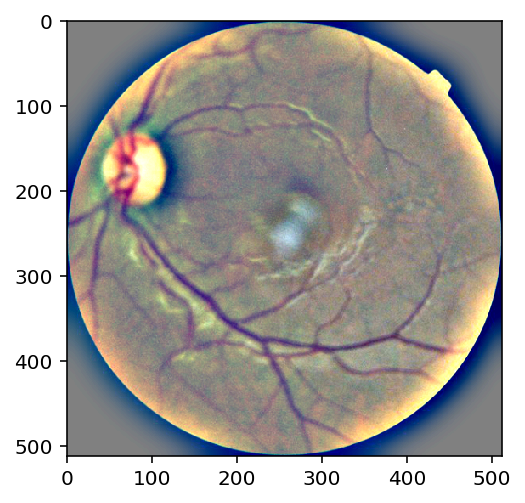

In [105]:
plt.imshow(sample_img)